# Lake chemistry data: Exploratory analysis

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import seaborn as sns
import warnings

In [54]:
import jupyter_black

jupyter_black.load()

In [55]:
warnings.filterwarnings("ignore", module="seaborn")

# 1. Load and inspect the data set

In [56]:
df_lake_chem = pd.read_csv("../data/LakeChem 2001-2022 Surface Season cleaned.csv")

In [57]:
df_lake_chem.head()

,MD-MVM Id,Nationellt övervakningsstations-ID,Övervakningsstation,Stationskoordinat N/X,Stationskoordinat E/Y,Län,Kommun,MS_CD C3,ProvId,Provdatum,...,Tot-P (µg/l P),Si (mg/l),Fe (µg/l),Al (µg/l),Al_s (µg/l),Syrgashalt (mg/l O2),Siktdjup (m),Siktdjup med kikare (m),Siktdjup utan kikare (m),Vattentemperatur (°C)
0,54,262403.0,Spjutsjön,6722638,524356,Dalarnas län,Falun,WA42559716,22480,2001-03-28,...,8.0,2.27,40.0,NaN,85.0,NaN,5.5,NaN,NaN,0.6
1,54,262403.0,Spjutsjön,6722638,524356,Dalarnas län,Falun,WA42559716,22481,2001-05-21,...,5.0,1.62,43.0,NaN,80.0,NaN,7.6,NaN,NaN,10.2
2,54,262403.0,Spjutsjön,6722638,524356,Dalarnas län,Falun,WA42559716,22482,2001-08-22,...,5.0,1.73,19.0,NaN,45.0,NaN,6.0,NaN,NaN,18.6
3,54,262403.0,Spjutsjön,6722638,524356,Dalarnas län,Falun,WA42559716,22483,2001-10-15,...,8.0,1.72,41.0,NaN,50.0,NaN,7.0,NaN,NaN,10.3
4,54,262403.0,Spjutsjön,6722638,524356,Dalarnas län,Falun,WA42559716,22484,2002-02-26,...,8.0,1.89,36.0,NaN,55.0,NaN,NaN,NaN,NaN,1.5


## Data quality and coverage

Data set contains 8974 observations and 52 columns. There are 108 lakes included, and there are between 171 and 34 measurements per lake.

In [58]:
df_lake_chem.shape

(8974, 52)

In [59]:
print(df_lake_chem["Övervakningsstation"].value_counts())

Övervakningsstation
Stora Skärsjön    171
Skärgölen         149
Hjärtsjön          87
Dagarn             87
Övre Skärsjön      87
                 ... 
Tronntjärnarna     60
Norra Reivo        60
Älgsjön            43
Fräcksjön          42
Stora Gryten       34
Name: count, Length: 108, dtype: int64


In [60]:
df_lake_chem.isnull().sum()

MD-MVM Id                                0
Nationellt övervakningsstations-ID     161
Övervakningsstation                      0
Stationskoordinat N/X                    0
Stationskoordinat E/Y                    0
Län                                      0
Kommun                                   0
MS_CD C3                               227
ProvId                                   0
Provdatum                                0
Provtagningsår                           0
Provtagningsmånad                        0
Provtagningsdag                          0
SeasonType                               0
Season                                   0
Season priority                          0
Season cleaning                          0
Max provdjup (m)                         1
TOC (mg/l C)                             0
DOC (mg/l C)                          8553
Tot-N_ps (µg/l N)                     6607
Tot-N_TNb (µg/l N)                    2375
Abs_F 254 (/5cm)                      4921
Abs_F 365 (

In [61]:
list_of_lakes = df_lake_chem["Övervakningsstation"].unique().tolist()
print(list_of_lakes)

['Spjutsjön', 'Edasjön', 'Mäsen', 'Hällsjön', 'Gipsjön', 'Översjön', 'Remmarsjön', 'Hällvattnet', 'Siggeforasjön', 'Bäen', 'Valkeajärvi', 'Valasjön', 'Skärsjön', 'Latnjajaure', 'Sännen', 'Svinarydsjön', 'Örsjön', 'Harasjön', 'Svartesjön', 'Stora Skärsjön', 'Fyrsjön', 'Älgarydssjön', 'Björken', 'Älgsjön', 'Rammsjön', 'Lilla Öresjön', 'Överudssjön', 'N. Yngern', 'Stora Envättern', 'Hjärtsjön', 'Fiolen', 'Storasjö', 'Ulvsjön', 'Bysjön', 'Dagarn', 'Övre Skärsjön', 'Hinnasjön', 'Limmingsjön', 'Granvattnet', 'Rotehogstjärnen', 'Hökesjön', 'Allgjuttern', 'Bergträsket', 'Brunnsjön', 'Tomeshultagölen', 'Stora Tresticklan', 'Brännträsket', 'St. Lummersjön', 'Vuolgamjaure', 'Stor-Arasjön', 'Öjsjön', 'Njalakjaure', 'Täftesträsket', 'Stora Gryten', 'Skärgölen', 'Grissjön', 'Alsjön', 'Degervattnet', 'Humsjön', 'Stor-Björsjön', 'Sangen', 'Stor-Backsjön', 'Västra Solsjön', 'Fräcksjön', 'Tärnan', 'Tängersjö', 'Fjärasjö', 'Louvvajaure', 'Jutsajaure', 'Övre Fjätsjön', 'Pahajärvi', 'Tväringen', 'Sidensjön

In [62]:
len(list_of_lakes)

108

In [63]:
# Combine old and new way of calculating Tot-N
df_lake_chem["Tot-N (µg/l N)"] = np.where(
    df_lake_chem["Tot-N_TNb (µg/l N)"].notnull(),
    df_lake_chem["Tot-N_TNb (µg/l N)"],
    df_lake_chem["Tot-N_ps (µg/l N)"],
)

In [73]:
# Calculate absorbance at 254 nm where missing
df_lake_chem["Abs_F 254 (/5cm)"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
8969    0.188
8970    0.280
8971    0.217
8972    0.239
8973    0.188
Name: Abs_F 254 (/5cm), Length: 8974, dtype: float64

## Initial hypothesis on most important variables

Dependent: TOC (mg/l C); Abs_F 420 (/5cm); **potentially Abs_F 254 (/5cm) to be added**

Explanatory / control: SO4 (mekv/l) (sulfate); NH4-N (µg/l N) (ammonium); NO2+NO3-N (µg/l N) (nitrate, nitrite); PO4-P (µg/l P) (phosphate); Tot-P (µg/l P) (total phosphorus); Fe (µg/l) (iron); Siktdjup (m)

**--> Good data availability of all key variables except Siktdjup**

# 2. Correlation analysis

In [64]:
# Function to generate correlation heatmaps
def create_corr_heatmap(features, method):
    corr_data = df_lake_chem[features]

    # Calculate the correlation matrix
    correlation_matrix = corr_data.corr(method=method)

    # Create a Seaborn correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")

    plt.title(f"Correlation between all relevant features ({method})")

    plt.show()

In [65]:
# Function to generate correlation bar plots
def create_corr_barplot(features, dependent_var, method):
    corr_data = df_lake_chem[features]

    # Calculate the correlation matrix
    correlation_matrix = corr_data.corr(method=method)

    # Extract the correlation values for the dependent variable
    corr_values = correlation_matrix[dependent_var][1:].sort_values(ascending=False)

    # Create a bar plot for sorted correlations using Seaborn
    plt.figure(figsize=(8, 6))
    sns.barplot(x=corr_values.values, y=corr_values.index, palette="coolwarm_r")
    plt.gca().invert_xaxis()

    for i, val in enumerate(corr_values.values):
        if val < 0:
            plt.text(val, i, f"{val:.2f}", ha="left", va="center")
        else:
            plt.text(val, i, f"{val:.2f}", ha="right", va="center")

    plt.ylabel("Features")
    plt.title(f"Correlation with {dependent_var} ({method})")

    plt.show()

## Total organic carbon (TOC); Pearson correlation

**TOC** and all potential **explanatory variables** (not all of them are necessarily truly "explanatory"). Note that Pearson assumes a linear relationship between the two variables.

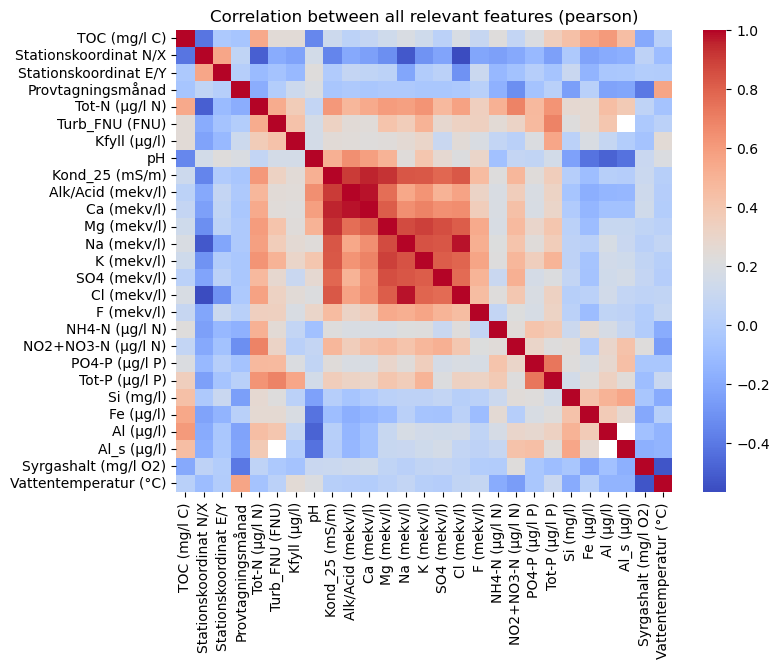

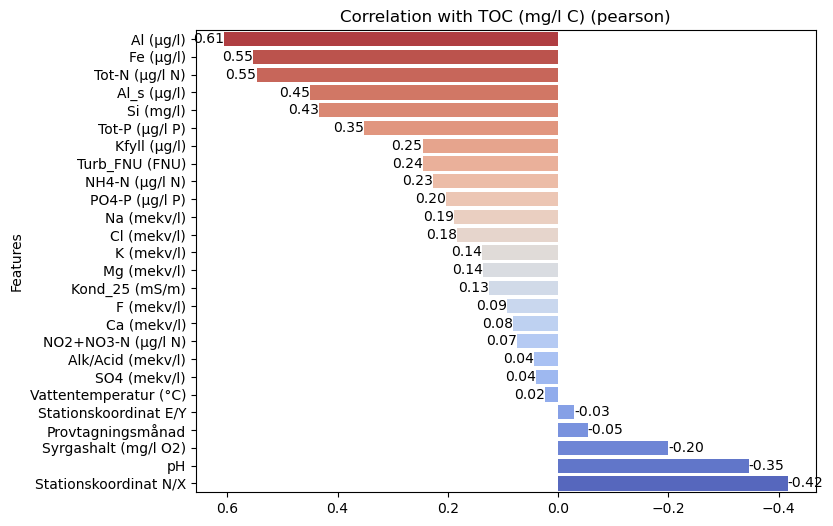

In [66]:
# Select relevant features to include in analysis
toc_and_explan = [
    "TOC (mg/l C)",
    "Stationskoordinat N/X",
    "Stationskoordinat E/Y",
    "Provtagningsmånad",
    "Tot-N (µg/l N)",
    "Turb_FNU (FNU)",
    "Kfyll (µg/l)",
    "pH",
    "Kond_25 (mS/m)",
    "Alk/Acid (mekv/l)",
    "Ca (mekv/l)",
    "Mg (mekv/l)",
    "Na (mekv/l)",
    "K (mekv/l)",
    "SO4 (mekv/l)",
    "Cl (mekv/l)",
    "F (mekv/l)",
    "NH4-N (µg/l N)",
    "NO2+NO3-N (µg/l N)",
    "PO4-P (µg/l P)",
    "Tot-P (µg/l P)",
    "Si (mg/l)",
    "Fe (µg/l)",
    "Al (µg/l)",
    "Al_s (µg/l)",
    "Syrgashalt (mg/l O2)",
    "Vattentemperatur (°C)",
]

create_corr_heatmap(toc_and_explan, method="pearson")
create_corr_barplot(toc_and_explan, "TOC (mg/l C)", method="pearson")

**Conclusion:** The chemical properties most positively correlated with TOC concentration (correlation coefficients >0.4) are Al, Tot-N, Fe, Al_s and Si. For negative correlation, only the latitude is <0.4. 

## Total organic carbon (TOC); Spearman rank correlation

Spearman does not assume that the relationship between variables is linear.

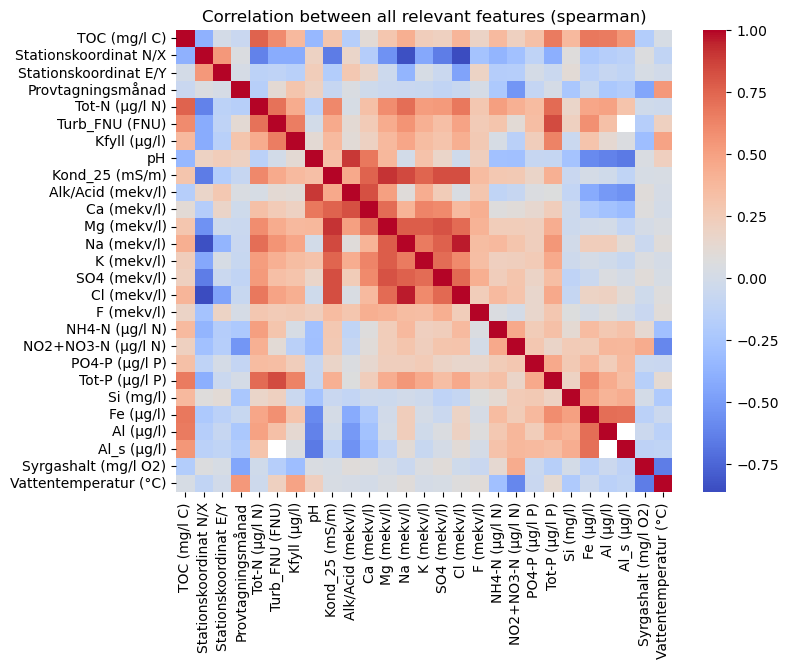

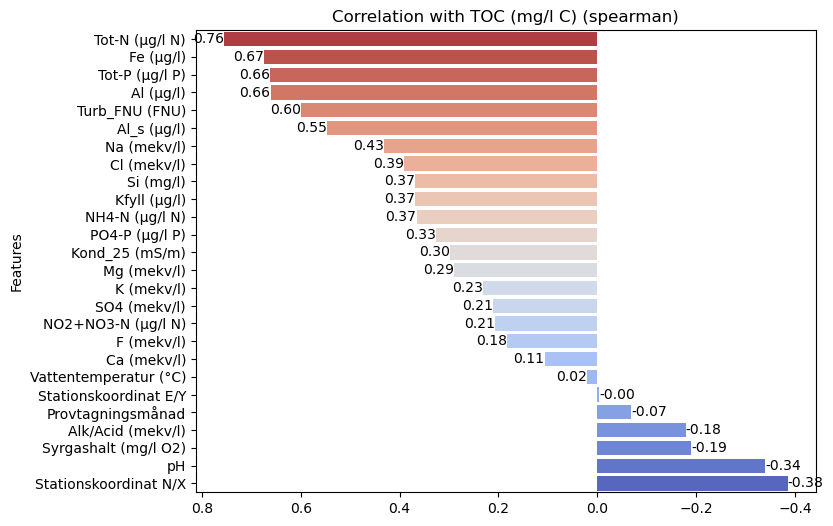

In [67]:
create_corr_heatmap(toc_and_explan, method="spearman")
create_corr_barplot(toc_and_explan, "TOC (mg/l C)", method="spearman")

**Conclusion:** There are more chemical properties with higher correlation coefficients using Spearman. This suggests that we should use a nonlinear model for further analysis and predictions.

## Absorbance 420 nm; Pearson correlation

**Abs_F 420 (/5cm)** and all potential **explanatory variables** (not all of them are necessarily truly "explanatory").

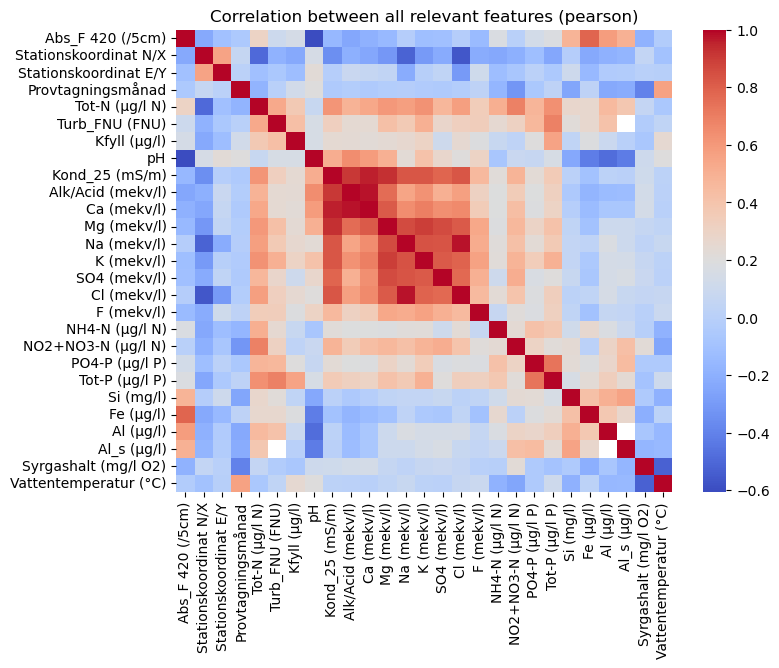

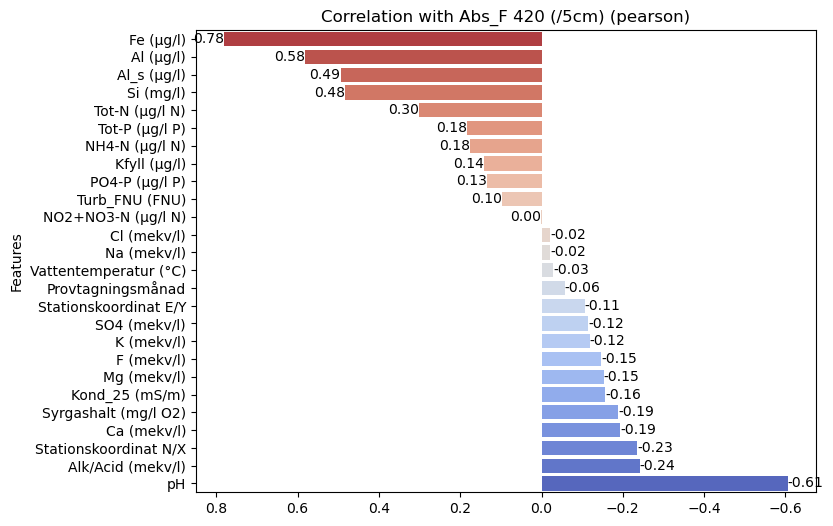

In [68]:
abs_and_explan = [
    "Abs_F 420 (/5cm)",
    "Stationskoordinat N/X",
    "Stationskoordinat E/Y",
    "Provtagningsmånad",
    "Tot-N (µg/l N)",
    "Turb_FNU (FNU)",
    "Kfyll (µg/l)",
    "pH",
    "Kond_25 (mS/m)",
    "Alk/Acid (mekv/l)",
    "Ca (mekv/l)",
    "Mg (mekv/l)",
    "Na (mekv/l)",
    "K (mekv/l)",
    "SO4 (mekv/l)",
    "Cl (mekv/l)",
    "F (mekv/l)",
    "NH4-N (µg/l N)",
    "NO2+NO3-N (µg/l N)",
    "PO4-P (µg/l P)",
    "Tot-P (µg/l P)",
    "Si (mg/l)",
    "Fe (µg/l)",
    "Al (µg/l)",
    "Al_s (µg/l)",
    "Syrgashalt (mg/l O2)",
    "Vattentemperatur (°C)",
]

create_corr_heatmap(abs_and_explan, method="pearson")
create_corr_barplot(abs_and_explan, "Abs_F 420 (/5cm)", method="pearson")

**Conclusion:** The chemical properties most positively correlated with Absorbance (correlation coefficients >0.4) are Fe, Al, Al_s and Si. For negative correlation, only the pH is <0.4. 

## Absorbance 420 nm; Spearman rank correlation

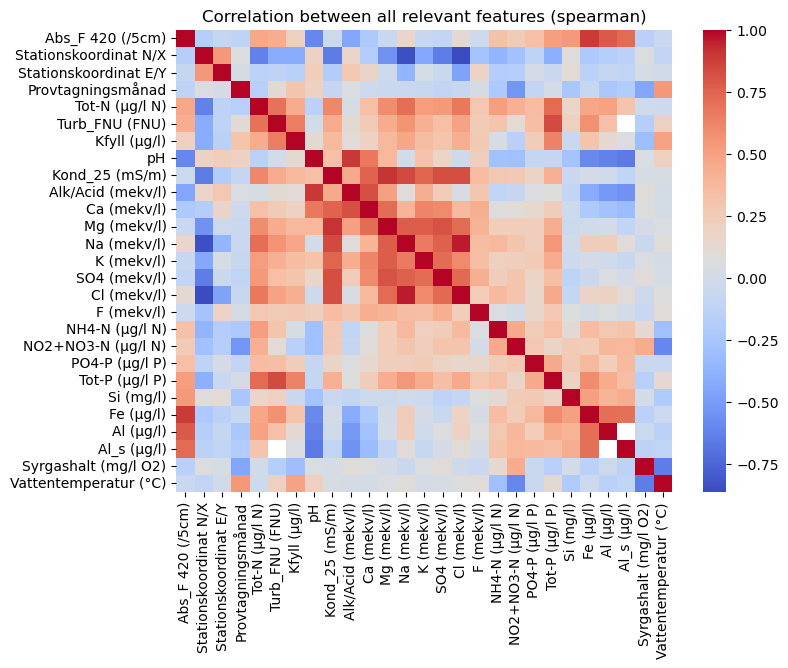

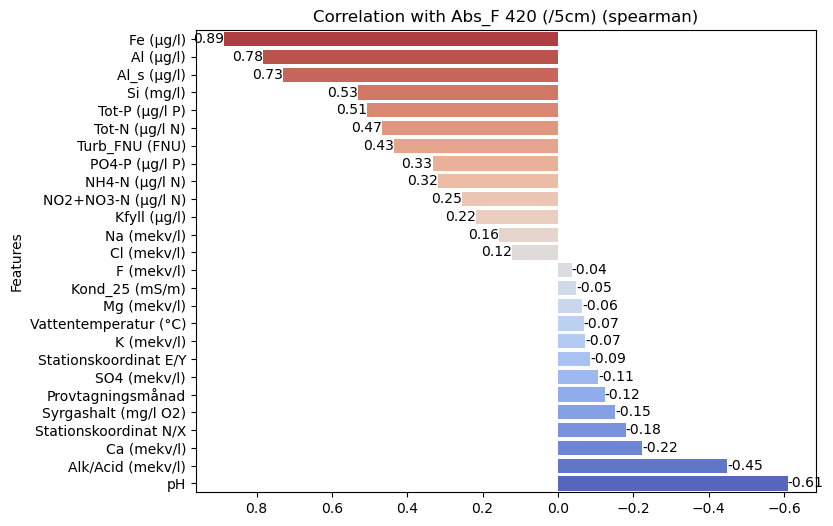

In [69]:
create_corr_heatmap(abs_and_explan, method="spearman")
create_corr_barplot(abs_and_explan, "Abs_F 420 (/5cm)", method="spearman")

# 3. Time series plots of different variables

## Relationship between variables for a select lake

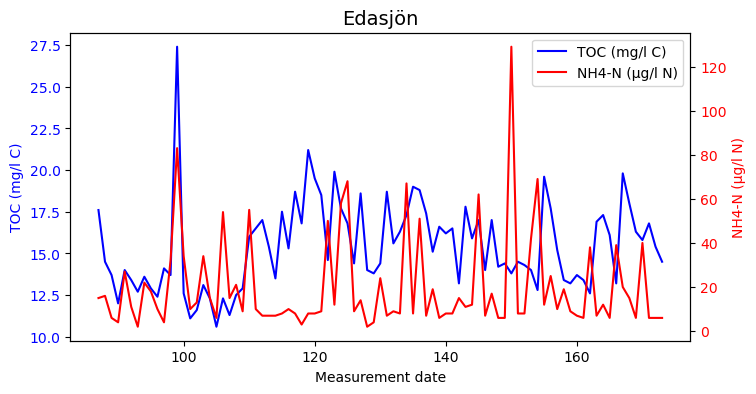

In [70]:
# Select what lake and variables to study
lake = "Edasjön"
dependent_var = "TOC (mg/l C)"
explan_var = "NH4-N (µg/l N)"

data_for_plot = df_lake_chem.loc[df_lake_chem["Övervakningsstation"] == lake]

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the first variable on the left y-axis
ax1.plot(
    data_for_plot.index, data_for_plot[dependent_var], color="b", label=dependent_var
)
ax1.set_xlabel("Measurement date")
ax1.set_ylabel(dependent_var, color="b")
ax1.tick_params(axis="y", labelcolor="b")

# Create a secondary y-axis and plot the second variable on it
ax2 = ax1.twinx()
ax2.plot(data_for_plot.index, data_for_plot[explan_var], color="r", label=explan_var)
ax2.set_ylabel(explan_var, color="r")
ax2.tick_params(axis="y", labelcolor="r")

# Add legends for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

plt.title(f"{lake}", fontsize=14)

plt.show()

## Relationship between two variables for all lakes

In [71]:
# Function to generate and save plots for a specific lake and set of variables
def generate_and_save_plots(lake_id, dependent_var, explan_var, ax):
    # Filter data for the specific lake
    lake_data = df_lake_chem[df_lake_chem["Övervakningsstation"] == lake_id]

    # Plot the first variable on the left y-axis
    ax.plot(lake_data[dependent_var], color="b", label=dependent_var)

    # Create a second y-axis for the second variable
    ax2 = ax.twinx()
    ax2.plot(lake_data[explan_var], color="r", label=explan_var)

    # Set a title for the plot
    ax.set_title(f"{lake_id}")

    # Remove x and y-axis tick numbers
    ax.set_xticks([])
    ax.set_yticks([])
    ax2.set_yticks([])

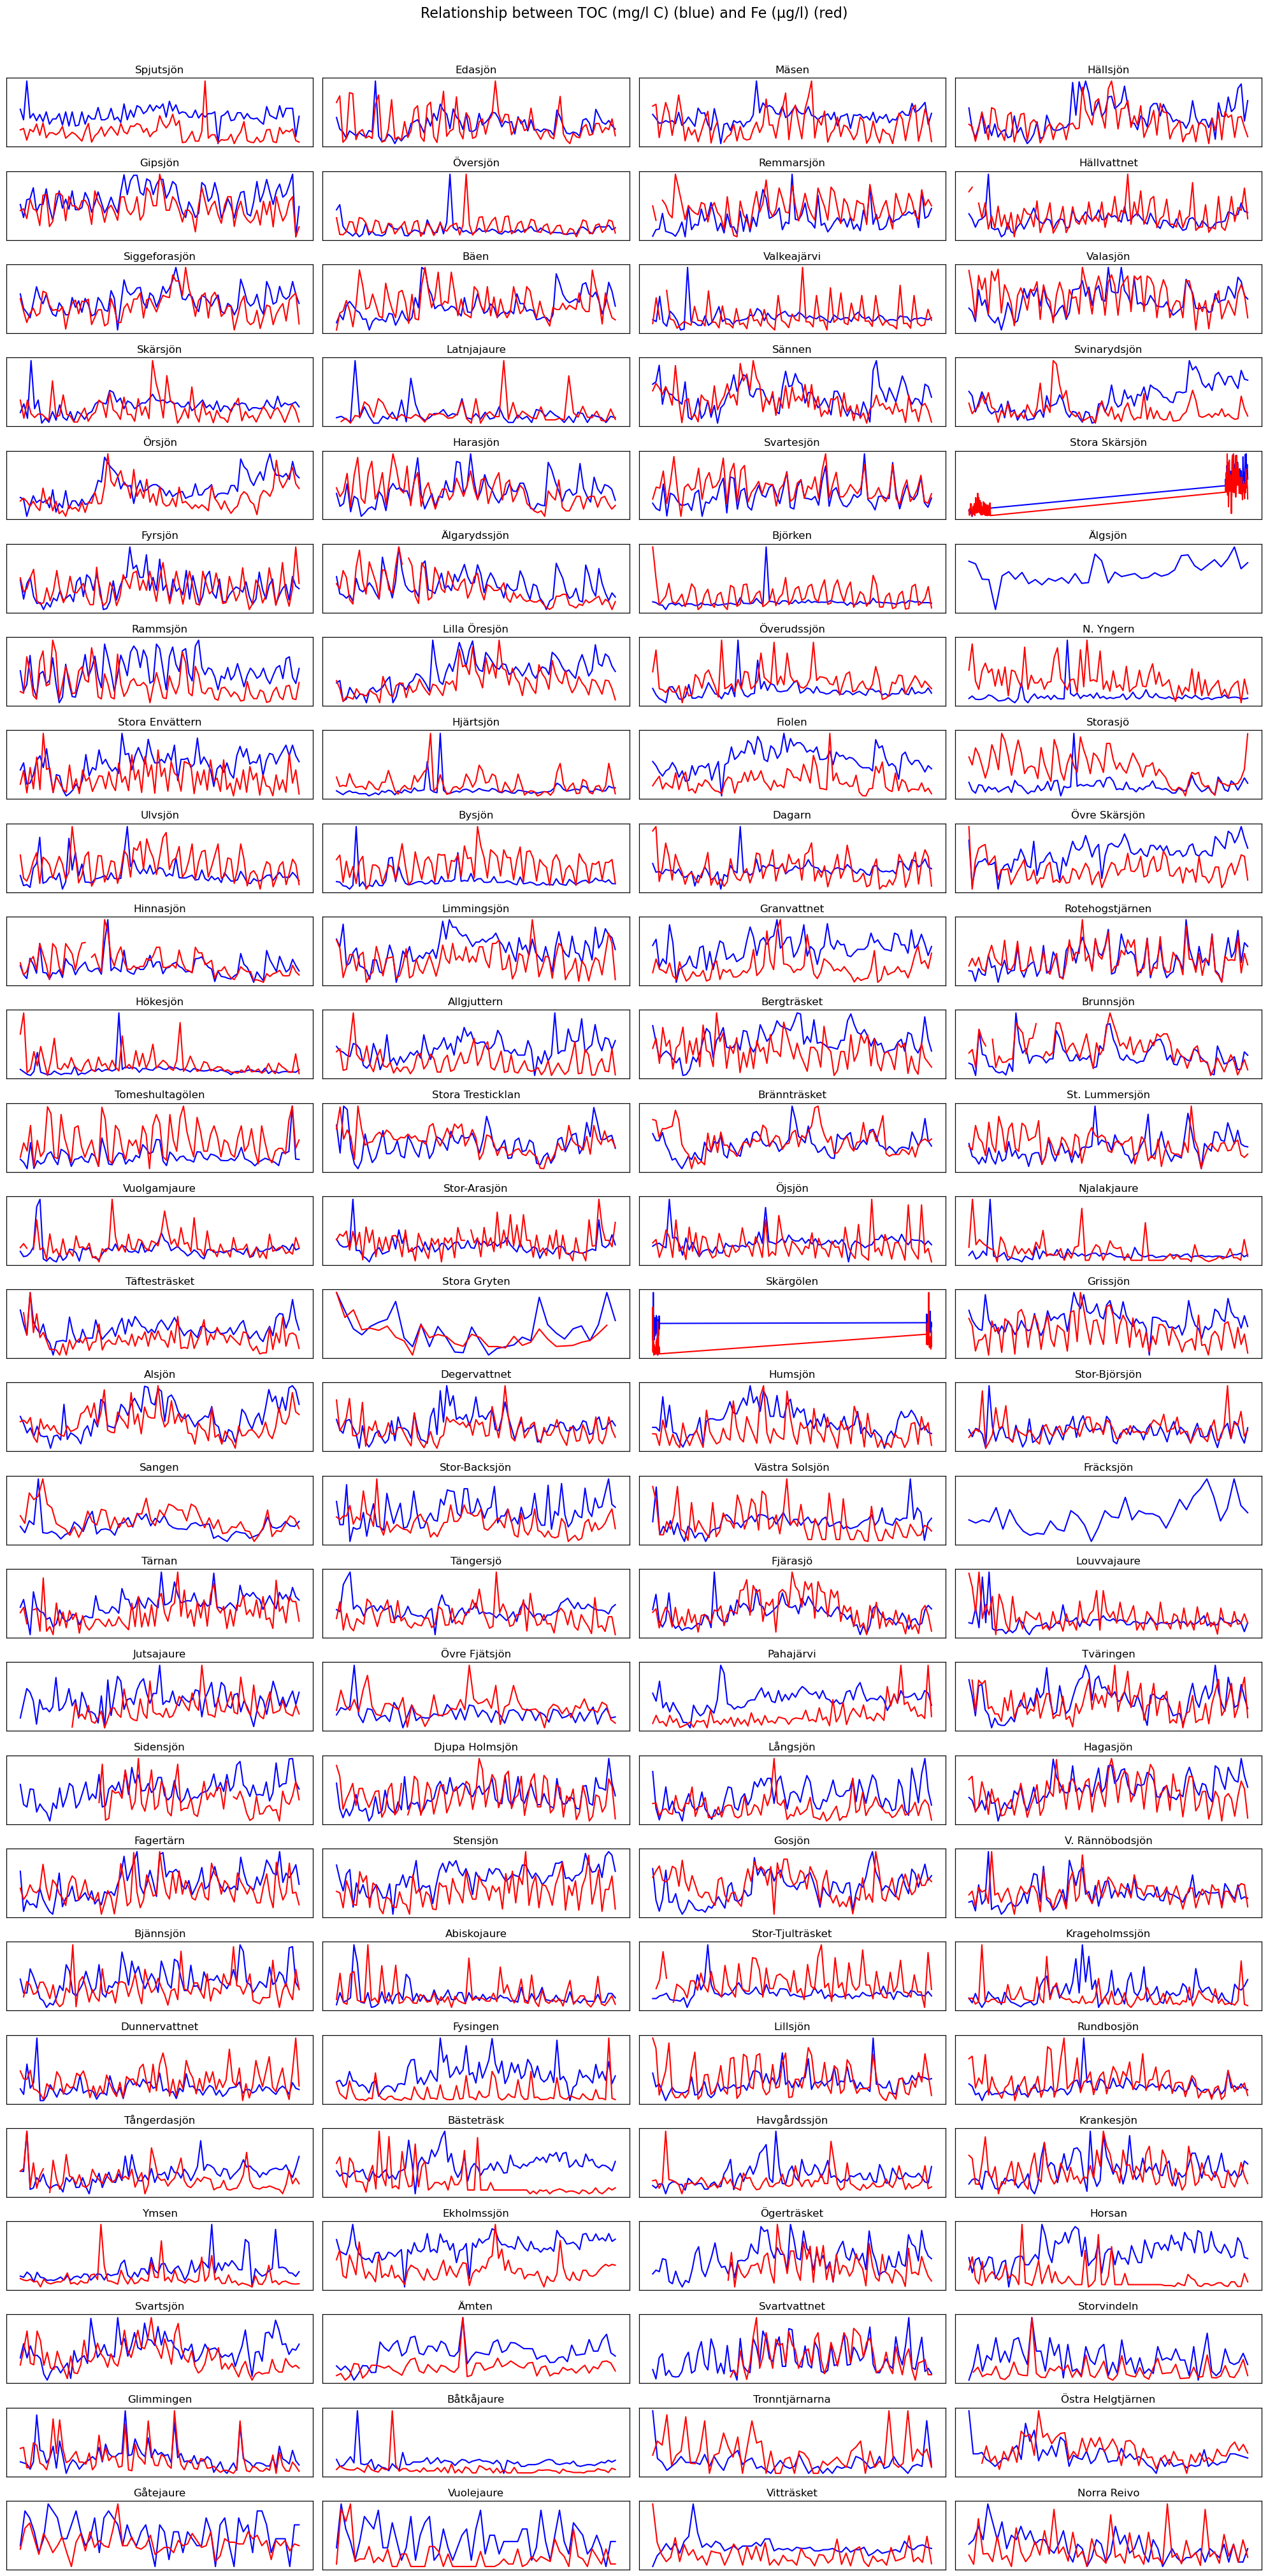

In [72]:
# Calculate the number of rows and columns for the subplot grid
num_lakes = len(list_of_lakes)
num_cols = 4
num_rows = ceil(num_lakes / num_cols)

# Variables to study

# Values to select from: ["TOC (mg/l C)", "Abs_F 420 (/5cm)"]
dependent_var = "TOC (mg/l C)"

# Values to select from: ["Tot-N_ps (µg/l N)", "Tot-N_TNb (µg/l N)",
# "Turb_FNU (FNU)", "Si (mg/l)", "Fe (µg/l)", "Al (µg/l)", "Al_s (µg/l)",
# "Tot-P (µg/l P)", "Na (mekv/l)", "pH", "Alk/Acid (mekv/l)"]
explan_var = "Fe (µg/l)"


# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

# Generate and save plots for each lake in the subplot grid
for i, lake_id in enumerate(list_of_lakes):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    generate_and_save_plots(lake_id, dependent_var, explan_var, ax)

# Remove empty subplots
for i in range(len(list_of_lakes), num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    fig.delaxes(axes[row_idx, col_idx])

fig.suptitle(
    f"Relationship between {dependent_var} (blue) and {explan_var} (red)",
    y=1.01,
    fontsize=16,
)
plt.tight_layout()

# Save the figure
dep = "TOC"
expl = "Fe"
plt.savefig(f"../plots/all_lakes_{dep}_{expl}.png", bbox_inches="tight")

plt.show()

**Interesting pattern:** For variables with high overall correlation with the dependent variable, there is big discrepancy between individual lakes. For some of them, the correlation is almost perfect. For others it's almost uncorrelated.